In [80]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
import xarray as xr
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))

from convergence_functions import *

from matplotlib.ticker import LogFormatter

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
simple_pump = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/case_01')

OSError: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/case_01/BOUT.dmp.*.nc

In [18]:
# print(simple_pump)

for var_name, data_array in simple_pump.data_vars.items():
    print(f"Variable: {var_name}")
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    # print("\n")  # Add a new line for better readability


Variable: Bxy
Variable: Ed+_iz
Variable: Ed+_rec
Variable: Ed+_sheath
Variable: Ed_target_recycle
Variable: Edd+_cx
Variable: Ee_sheath
Variable: EnergyFlow_d+_ylow
Variable: EnergyFlow_e_ylow
Variable: Fd+_iz
Variable: Fd+_rec
Variable: Fdd+_cx
Variable: G1
Variable: G2
Variable: G3
Variable: J
Variable: Kd+_cond
Variable: Kd_cond
Variable: Kdd+_cx
Variable: Ke_cond
Variable: NVd
Variable: NVd+
Variable: Nd
Variable: Nd+
Variable: Ne
Variable: Pd
Variable: Pd+
Variable: Pd+_src
Variable: Pd_src
Variable: Pe
Variable: Pe_src
Variable: Rd+_ex
Variable: Rd+_rec
Variable: Rneon
Variable: SNVd
Variable: SNVd+
Variable: SNd
Variable: SNd+
Variable: SPd
Variable: SPd+
Variable: SPe
Variable: Sd+_feedback
Variable: Sd+_iz
Variable: Sd+_rec
Variable: Sd+_sheath
Variable: Sd+_src
Variable: Sd_src
Variable: Sd_target_recycle
Variable: Td
Variable: Td+
Variable: Te
Variable: Vd
Variable: Vd+
Variable: Ve
Variable: cvode_last_order
Variable: cvode_last_step
Variable: cvode_nfevals
Variable: cvode_

In [10]:
print(simple_pump['simple_pump_sink_d'])

ds = simple_pump.isel(t=-1)

<xarray.DataArray 'simple_pump_sink_d' (t: 136, x: 1, y: 400, z: 1)>
dask.array<mul, shape=(136, 1, 400, 1), dtype=float64, chunksize=(136, 1, 10, 1), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
  * t        (t) float64 1.658e+07 1.659e+07 1.66e+07 ... 1.726e+07 1.726e+07
  * x        (x) int64 0
  * y        (y) float64 0.1945 0.5831 0.9708 1.357 ... 81.92 81.95 81.97 81.99
  * z        (z) float64 3.142
Attributes:
    current_time_index:  136
    cell_location:       CELL_CENTRE
    conversion:          9.578833303066081e+26
    direction_y:         Standard
    direction_z:         Standard
    long_name:           simple pump source shape
    source:              simple_pump
    time_dimension:      t
    units:               m^-3 / s
    metadata:            {'BOUT

<xarray.DataArray 't' ()>
array(17260000.)
Coordinates:
    t        float64 1.726e+07
Attributes:
    current_time_index:  136
    source:              
    time_dimension:      t
    metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
    options:             MXG = 0\t\t# unused value (NOT marked conditionally ...
    geometry:            
    units:               s
    conversion:          1.0439684754508785e-08
    standard_name:       time
    long_name:           Time


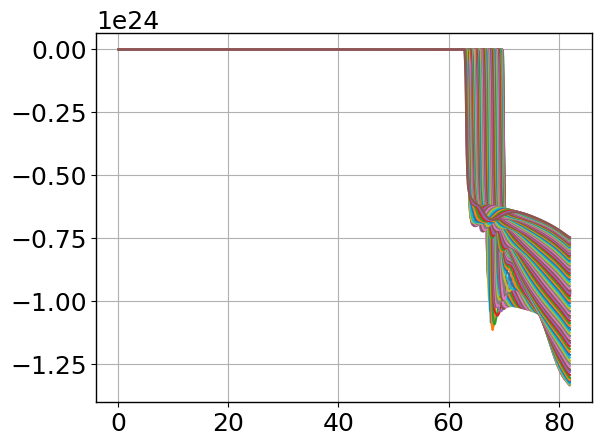

In [15]:
sink = np.ravel(ds['simple_pump_sink_d'])
y = ds['y']

print(ds['t'])
for t_indx, t  in enumerate(simple_pump['t']):
    ds = simple_pump.isel(t=t_indx)
    sink = np.ravel(ds['simple_pump_sink_d'])
    y = ds['y']
    plt.plot(y, sink)

ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

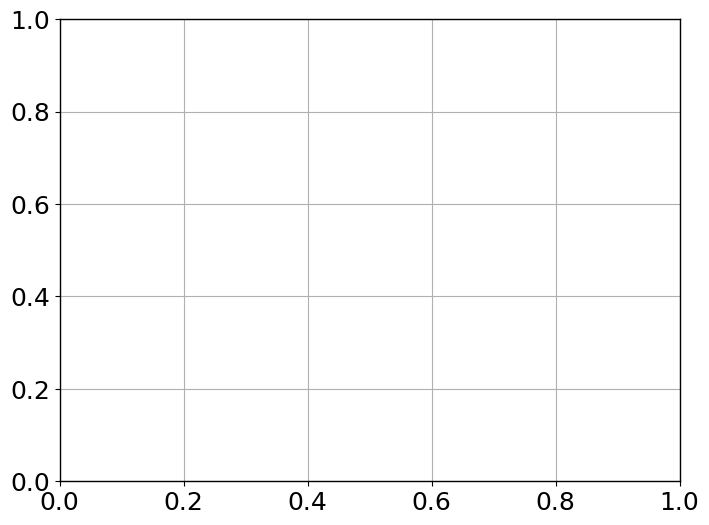

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr  # Assuming the data is in xarray format for simplicity
import imageio

# Load your data here (assuming an xarray dataset)
# ds = xr.open_dataset('your_dataset.nc')  # Uncomment and specify your dataset path

# List of source terms to plot
source_terms = [
    "Pd+_src", "Pd_src", "Pe_src", "Sd+_src", "Sd_src",
    "SNVd", "SNVd+", "SNd", "SNd+", "SPd", "SPd+", "SPe",
    "density_feedback_src_i_d+", "density_feedback_src_mult_d+",
    "density_feedback_src_p_d+", "density_feedback_src_shape_d+",
    "simple_pump_src_shape_d"
]

ds = simple_pump

# Directory to save frames (frames will be deleted later if unwanted)
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)
frames = []

# Check if 't' exists and retrieve time values
time_values = ds["t"].values if "t" in ds else [0]  # Default to a single time step if t is missing

# Loop over each time step and source term, save each as a frame
for t_indx, t in enumerate(time_values):  # Enumerate over time steps
    for term in source_terms:
        if term in ds:  # Check that the term exists in the dataset
            plt.figure(figsize=(8, 6))
            
            # Check if the 't' dimension exists for this variable
            if "t" in ds[term].dims:
                data = np.ravel(ds[term].isel(t=t_indx).values)  # Flatten data to 1D
            else:
                data = np.ravel(ds[term].values)  # No time dimension, use values directly

            y = np.ravel(ds["y"].values) if "y" in ds else np.arange(data.size)  # Flatten y as well
            
            plt.plot(y, data)
            plt.title(f"{term} at t={t}")
            plt.xlabel("y")
            plt.ylabel(term)
            plt.grid(True)
            
            # Save frame for this term and time step
            frame_path = f"{frames_dir}/{term}_t{t_indx:03}.png"
            plt.savefig(frame_path)
            plt.close()
            frames.append(frame_path)

# Convert frames to mp4
with imageio.get_writer("source_terms_video.mp4", fps=2) as video:
    for frame_path in frames:
        video.append_data(imageio.imread(frame_path))

# Cleanup frames after creating the video
for frame_path in frames:
    os.remove(frame_path)

print("Video saved as source_terms_video.mp4")


# Reservoir model

In [8]:
res = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/reservior_test/res_scen_dev/case_06_single_core_pump_deactivate')

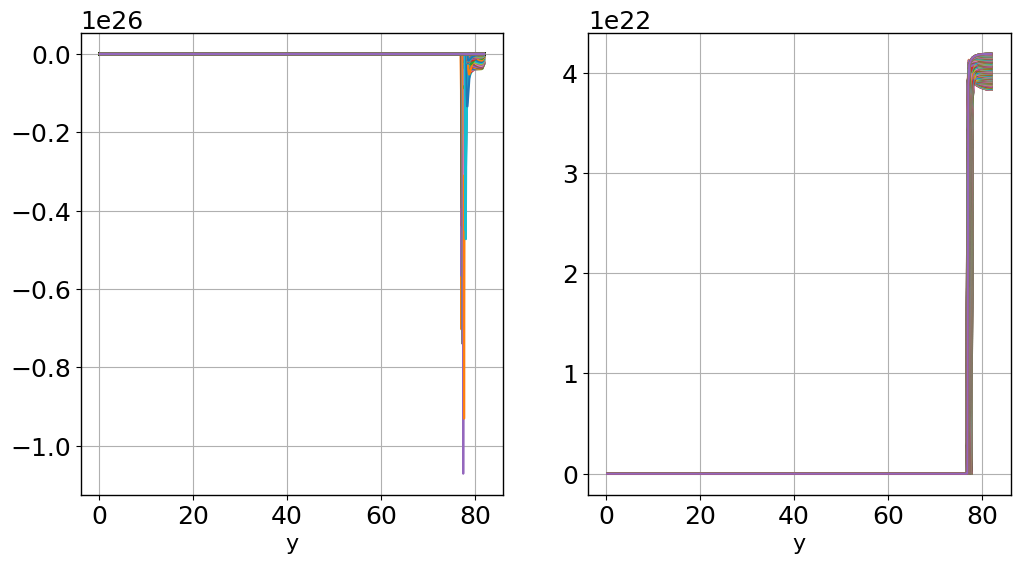

In [9]:
# print(res['t'].values)
fig, ax = plt.subplots(1,2, figsize=(12,6))
for t_indx, t  in enumerate(res['t']):
    if t_indx > 30:
        ds = res.isel(t=t_indx)
        sink = np.ravel(ds['Sd_rsv_div_sol'])
        nd = np.ravel(ds['Nd'])
        y = ds['y']
        ax[0].plot(y, sink)
        ax[1].plot(y, nd)


for axes in ax:
    axes.set_xlabel('y')
    axes.grid(True)
    # axes.set_yscale('log')
# plt.xlim(76,80)



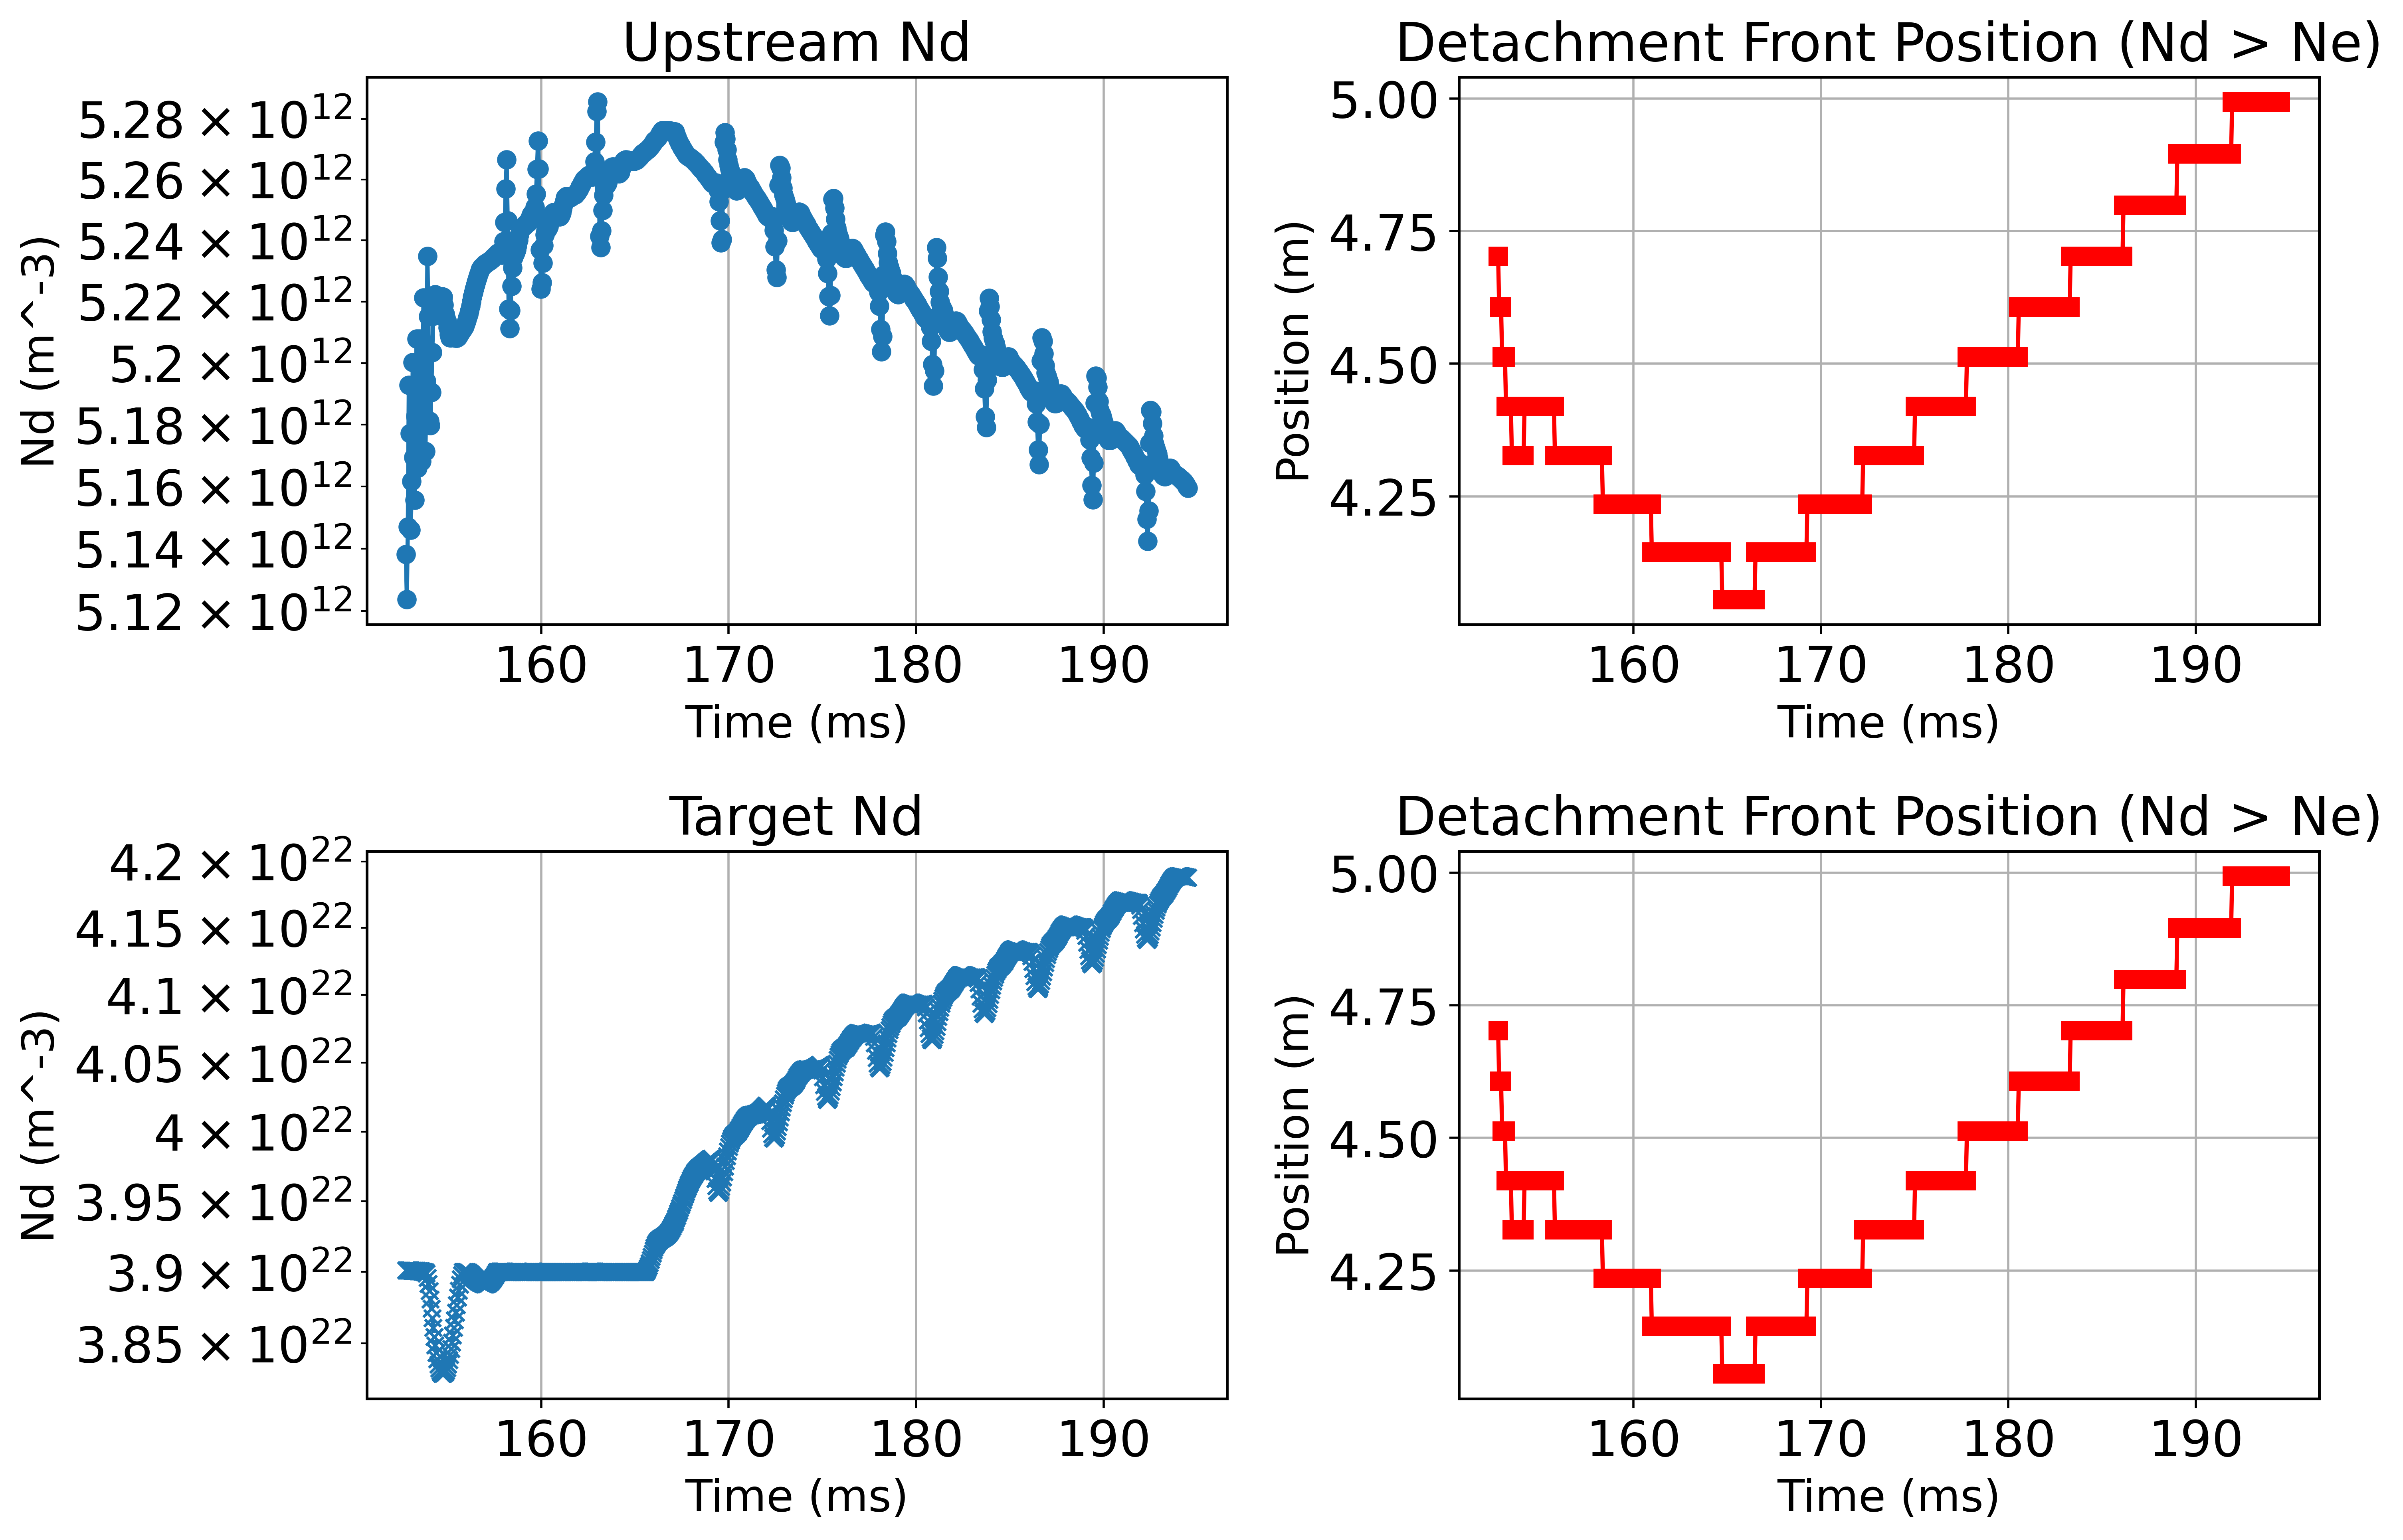

In [10]:
plot_time_history(res,variables=['Nd'], track_detachment_front = True)


In [24]:
print(res.coords)
for var_name, data_array in res.data_vars.items():
    print(f"Variable: {var_name}")
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    # print("\n")  # Add a new line for better readability


Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    t        float64 0.0
  * x        (x) int64 0
  * y        (y) float64 0.1945 0.5831 0.9708 1.357 ... 81.92 81.95 81.97 81.99
  * z        (z) float64 3.142
Variable: Bxy
Variable: Ed+_iz
Variable: Ed+_rec
Variable: Ed+_sheath
Variable: Ed_rsv_div_pfr
Variable: Ed_rsv_div_sol
Variable: Ed_rsv_main_sol
Variable: Ed_target_recycle
Variable: Edd+_cx
Variable: Ee_sheath
Variable: Fd+_iz
Variable: Fd+_rec
Variable: Fd_rsv_div_pfr
Variable: Fd_rsv_div_sol
Variable: Fd_rsv_main_sol
Variable: Fdd+_cx
Variable: G1
Variable: G2
Variable: G3
Variable: J
Variable: Kd+_cond
Variable: Kd_cond
Variable: Kdd+_cx
Variable: Ke_cond
Variable: NVd
Variable: NVd+
Variable: Nd
Variable: Nd+
Variable: Ne
Variable: Pd
Variable: Pd+
Variable: Pd+_src
Variable: Pd_src
Varia

In [95]:
import matplotlib.animation as animation
from matplotlib.ticker import LogFormatter

def log_formatter():
    """
    Creates and returns a LogFormatter for use in plotting log-scaled data.
    
    This formatter will format the y-axis ticks to show non-scientific notation
    when the values are powers of 10, and scientific notation for others.

    Returns:
    LogFormatter: The formatter for logarithmic scale.
    """
    return LogFormatter(base=10.0, labelOnlyBase=False)


def plot_profiles_animation(simulation_data, variables=['Te'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e6, filename='profiles_animation.gif',
                            time_slices=(-40, None), step=1, detachment_front=False):
    """
    Creates an animated GIF of the specified variable profiles for a user-specified range of time slices,
    with time plotted in milliseconds. Optionally, plot the detachment front location.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    filename (str): The filename to save the animation as a GIF.
    time_slices (tuple): A tuple specifying the range of time slices to use for the animation (start_slice, end_slice).
                         Defaults to the last 40 time slices.
    step (int): Step interval for sampling time slices to reduce the number of frames.
    detachment_front (bool): If True, plot the detachment front as a horizontal dashed red line.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the time slices from the dataset with the specified step interval
    selected_steps = simulation_data.isel(t=slice(start_slice, end_slice, step))
    num_timesteps = selected_steps.sizes['t']  # Calculate the number of timesteps in the sampled range
    num_vars = len(variables)

    # Get time values in seconds and convert to milliseconds
    times = selected_steps['t'].values  # Corresponding time values
    t_conversion = simulation_data['t'].attrs.get('conversion', 1.0)
    times = times * t_conversion * 1e3  # Convert to milliseconds

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    # Precompute y-axis limits
    y_min = {}
    y_max = {}
    for var in variables:
        data_var = selected_steps[var]
        if guard_replace:
            data_var = data_var.isel(y=slice(1, -1))  # Exclude guard cells if needed
        y_min[var] = data_var.min().values
        y_max[var] = data_var.max().values

    def update_plot(t_index):
        """Updates the plot for the given time index."""
        current_data = selected_steps.isel(t=t_index)  # Select the time step within the sampled range
        current_time_ms = times[t_index]  # Get the corresponding time in milliseconds

        for i, var in enumerate(variables):
            ax = axs[i]
            ax.clear()  # Clear the previous frame

            y = current_data['y'].values
            var_data = np.ravel(current_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{data_label} ({var})'
            ax.plot(y, var_data, label=label, linestyle=linestyles[i])

            # Determine if log scale is needed based on threshold
            if np.max(np.abs(var_data)) > log_threshold:
                scale = "log"
            else:
                scale = "linear"

            # Set the appropriate scale
            ax.set_yscale(scale)
            if scale == "log":
                ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

            # Get units
            units = current_data[var].attrs.get('units', 'Unknown units')

            ax.set_xlabel(r'S$_\parallel$ (m)')
            ax.set_ylabel(f'{var} ({units})')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True)
            ax.set_title(f'Time: {current_time_ms:.2f} ms')
            ax.set_xlim(70, np.max(y))
            ax.set_ylim(y_min[var], y_max[var])  # Set fixed y-axis limits

            # Plot detachment front if enabled
            if detachment_front:
                front_loc = detachment_front_finder(current_data)
                if front_loc is not None:
                    ax.axvline(np.max(y)-front_loc, color='red', linestyle='--', label=f"Detachment Front: {front_loc:.2f} m")
                    ax.set_xlim(np.max(y)-front_loc-2, np.max(y))
                    

    # Create animation using FuncAnimation
    ani = animation.FuncAnimation(fig, update_plot, frames=num_timesteps, repeat=False)

    # Save the animation as a GIF using PillowWriter
    ani.save(filename, writer='pillow', fps=10)

    print(f"Animation saved as {filename}")
    plt.close()


In [93]:
import matplotlib.animation as animation
from matplotlib.ticker import LogFormatter

def log_formatter():
    """
    Creates and returns a LogFormatter for use in plotting log-scaled data.
    
    This formatter will format the y-axis ticks to show non-scientific notation
    when the values are powers of 10, and scientific notation for others.

    Returns:
    LogFormatter: The formatter for logarithmic scale.
    """
    return LogFormatter(base=10.0, labelOnlyBase=False)


def plot_profiles_animation(simulation_data, variables=['Te'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e6, filename='profiles_animation.gif',
                            time_slices=(-40, None), step=1, detachment_front=False):
    """
    Creates an animated GIF of the specified variable profiles for a user-specified range of time slices,
    with time plotted in milliseconds. Optionally, plot the detachment front location.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    filename (str): The filename to save the animation as a GIF.
    time_slices (tuple): A tuple specifying the range of time slices to use for the animation (start_slice, end_slice).
                         Defaults to the last 40 time slices.
    step (int): Step interval for sampling time slices to reduce the number of frames.
    detachment_front (bool): If True, plot the detachment front as a horizontal dashed red line.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the time slices from the dataset with the specified step interval
    selected_steps = simulation_data.isel(t=slice(start_slice, end_slice, step))
    num_timesteps = selected_steps.sizes['t']  # Calculate the number of timesteps in the sampled range
    num_vars = len(variables)

    # Get time values in seconds and convert to milliseconds
    times = selected_steps['t'].values  # Corresponding time values
    t_conversion = simulation_data['t'].attrs.get('conversion', 1.0)
    times = times * t_conversion * 1e3  # Convert to milliseconds

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    # Precompute y-axis limits
    y_min = {}
    y_max = {}
    for var in variables:
        data_var = selected_steps[var]
        if guard_replace:
            data_var = data_var.isel(y=slice(1, -1))  # Exclude guard cells if needed
        y_min[var] = data_var.min().values
        y_max[var] = data_var.max().values

    # Calculate initial detachment front position for static purple line
    initial_detachment_front = None
    detachment_front_max = None

    if detachment_front:
        # Determine the initial detachment front for the static purple line
        initial_detachment_front = detachment_front_finder(selected_steps.isel(t=0))

        # Calculate the maximum detachment front position over all time steps
        detachment_front_max = max(
            detachment_front_finder(selected_steps.isel(t=t_index)) or 0
            for t_index in range(num_timesteps)
        )

    def update_plot(t_index):
        """Updates the plot for the given time index."""
        current_data = selected_steps.isel(t=t_index)  # Select the time step within the sampled range
        current_time_ms = times[t_index]  # Get the corresponding time in milliseconds

        for i, var in enumerate(variables):
            ax = axs[i]
            ax.clear()  # Clear the previous frame

            y = current_data['y'].values
            var_data = np.ravel(current_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{data_label} ({var})'
            ax.plot(y, var_data, label=label, linestyle=linestyles[i])

            # Determine if log scale is needed based on threshold
            if np.max(np.abs(var_data)) > log_threshold:
                scale = "log"
            else:
                scale = "linear"

            # Set the appropriate scale
            ax.set_yscale(scale)
            if scale == "log":
                ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

            # Get units
            units = current_data[var].attrs.get('units', 'Unknown units')

            ax.set_xlabel(r'S$_\parallel$ (m)')
            ax.set_ylabel(f'{var} ({units})')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True)
            ax.set_title(f'Time: {current_time_ms:.2f} ms')

            ax.set_ylim(y_min[var], y_max[var])  # Set fixed y-axis limits

            # Set xlim based on maximum detachment front position with a 10% buffer
            if detachment_front and detachment_front_max is not None:
                buffer = detachment_front_max * 0.1
                ax.set_xlim(max(y) - detachment_front_max - buffer, max(y))

                # Plot the static initial detachment front as a purple line
                if initial_detachment_front is not None:
                    ax.axvline(initial_detachment_front, color='purple', linestyle='-', label="Initial Detachment Front")

                # Plot dynamic detachment front as a red dashed line for each frame
                front_loc = detachment_front_finder(current_data)
                if front_loc is not None:
                    ax.axvline(front_loc, color='red', linestyle='--', label=f"Detachment Front: {front_loc:.2f} m")

    # Create animation using FuncAnimation
    ani = animation.FuncAnimation(fig, update_plot, frames=num_timesteps, repeat=False)

    # Save the animation as a GIF using PillowWriter
    ani.save(filename, writer='pillow', fps=10)

    print(f"Animation saved as {filename}")
    plt.close()


In [18]:
from moviepy.editor import VideoFileClip

def convert_gif_to_mp4(gif_path, mp4_path):
    """
    Converts a GIF file to an MP4 file.

    Parameters:
    gif_path (str): Path to the input GIF file.
    mp4_path (str): Path to save the output MP4 file.
    """
    # Load the GIF
    clip = VideoFileClip(gif_path)
    
    # Write to MP4 format
    clip.write_videofile(mp4_path, codec="libx264")

# Example usage


In [43]:
plot_profiles_animation(res, variables=['Nd', 'Sd_rsv_div_sol'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e30, filename='profiles_animation.gif',
                            time_slices=(-800, None), step=10, detachment_front=True)

convert_gif_to_mp4('profiles_animation.gif', "output.mp4")


Animation saved as profiles_animation.gif
Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


# setting set density

In [109]:
steady_state = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_transients/type_1_ELM/FL/SXD/test/case_11_no_pi')

12240000.0
4.459706089577992e+22


12245000.0
4.831806000633113e+22


12250000.0
5.324606248864219e+22


12255000.0
5.848501392472926e+22


12260000.0
6.310643797792423e+22


12265000.0
6.380424086068226e+22


12270000.0
6.506570298612782e+22


12275000.0
6.6490374579921825e+22


12280000.0
6.7685728093669295e+22


12285000.0
6.7405779467117965e+22




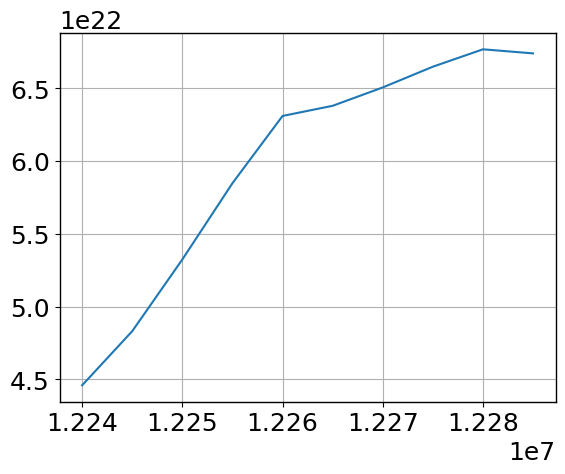

In [125]:
init_pulse = steady_state.isel(t=0)

time = []
src = []
for indx,i in enumerate(steady_state['t']):
    if indx < 10:
        # print(i.values)
        # print(np.ravel(steady_state.isel(t=indx)['Sd+_feedback'].values)[0])

        time.append(i.values)
        src.append(np.ravel(steady_state.isel(t=indx)['Sd+_feedback'].values)[0])
        # print('\n')

plt.plot(time,src)
# for indx, i in enumerate(steady_state):
    
#     current = steady_state.isel(t=indx)
#     print(np.ravel(current['Sd+_feedback'][0]))

# y = init_pulse['y']
# pi_srce = np.ravel(init_pulse['Sd+_feedback'])



# fig, ax = plt.subplots(1,1, figsize=(12,6))
# ax.plot(y, pi_srce)

In [ ]:
plot_time_history(steady_state, variables=['Sd+_feedback'])

NameError: name 'variables' is not defined

# Case from last week

In [105]:
pulse = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_transients/type_1_ELM/FL/SXD/test/case_02')

5.429963628125872e+22


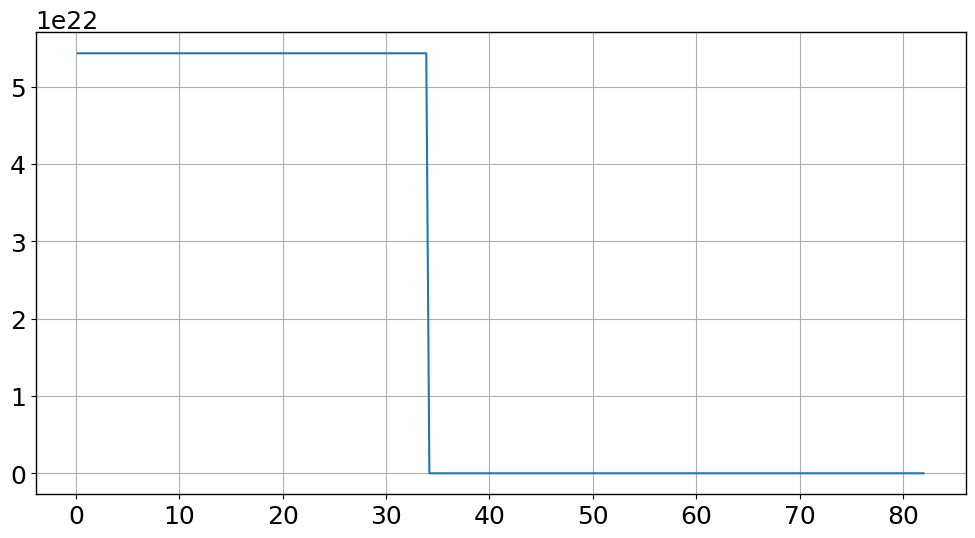

In [108]:
init_pulse = pulse.isel(t=0)
y = init_pulse['y']
pi_srce = np.ravel(init_pulse['Sd+_feedback'])

print(pi_srce[5])

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(y, pi_srce)

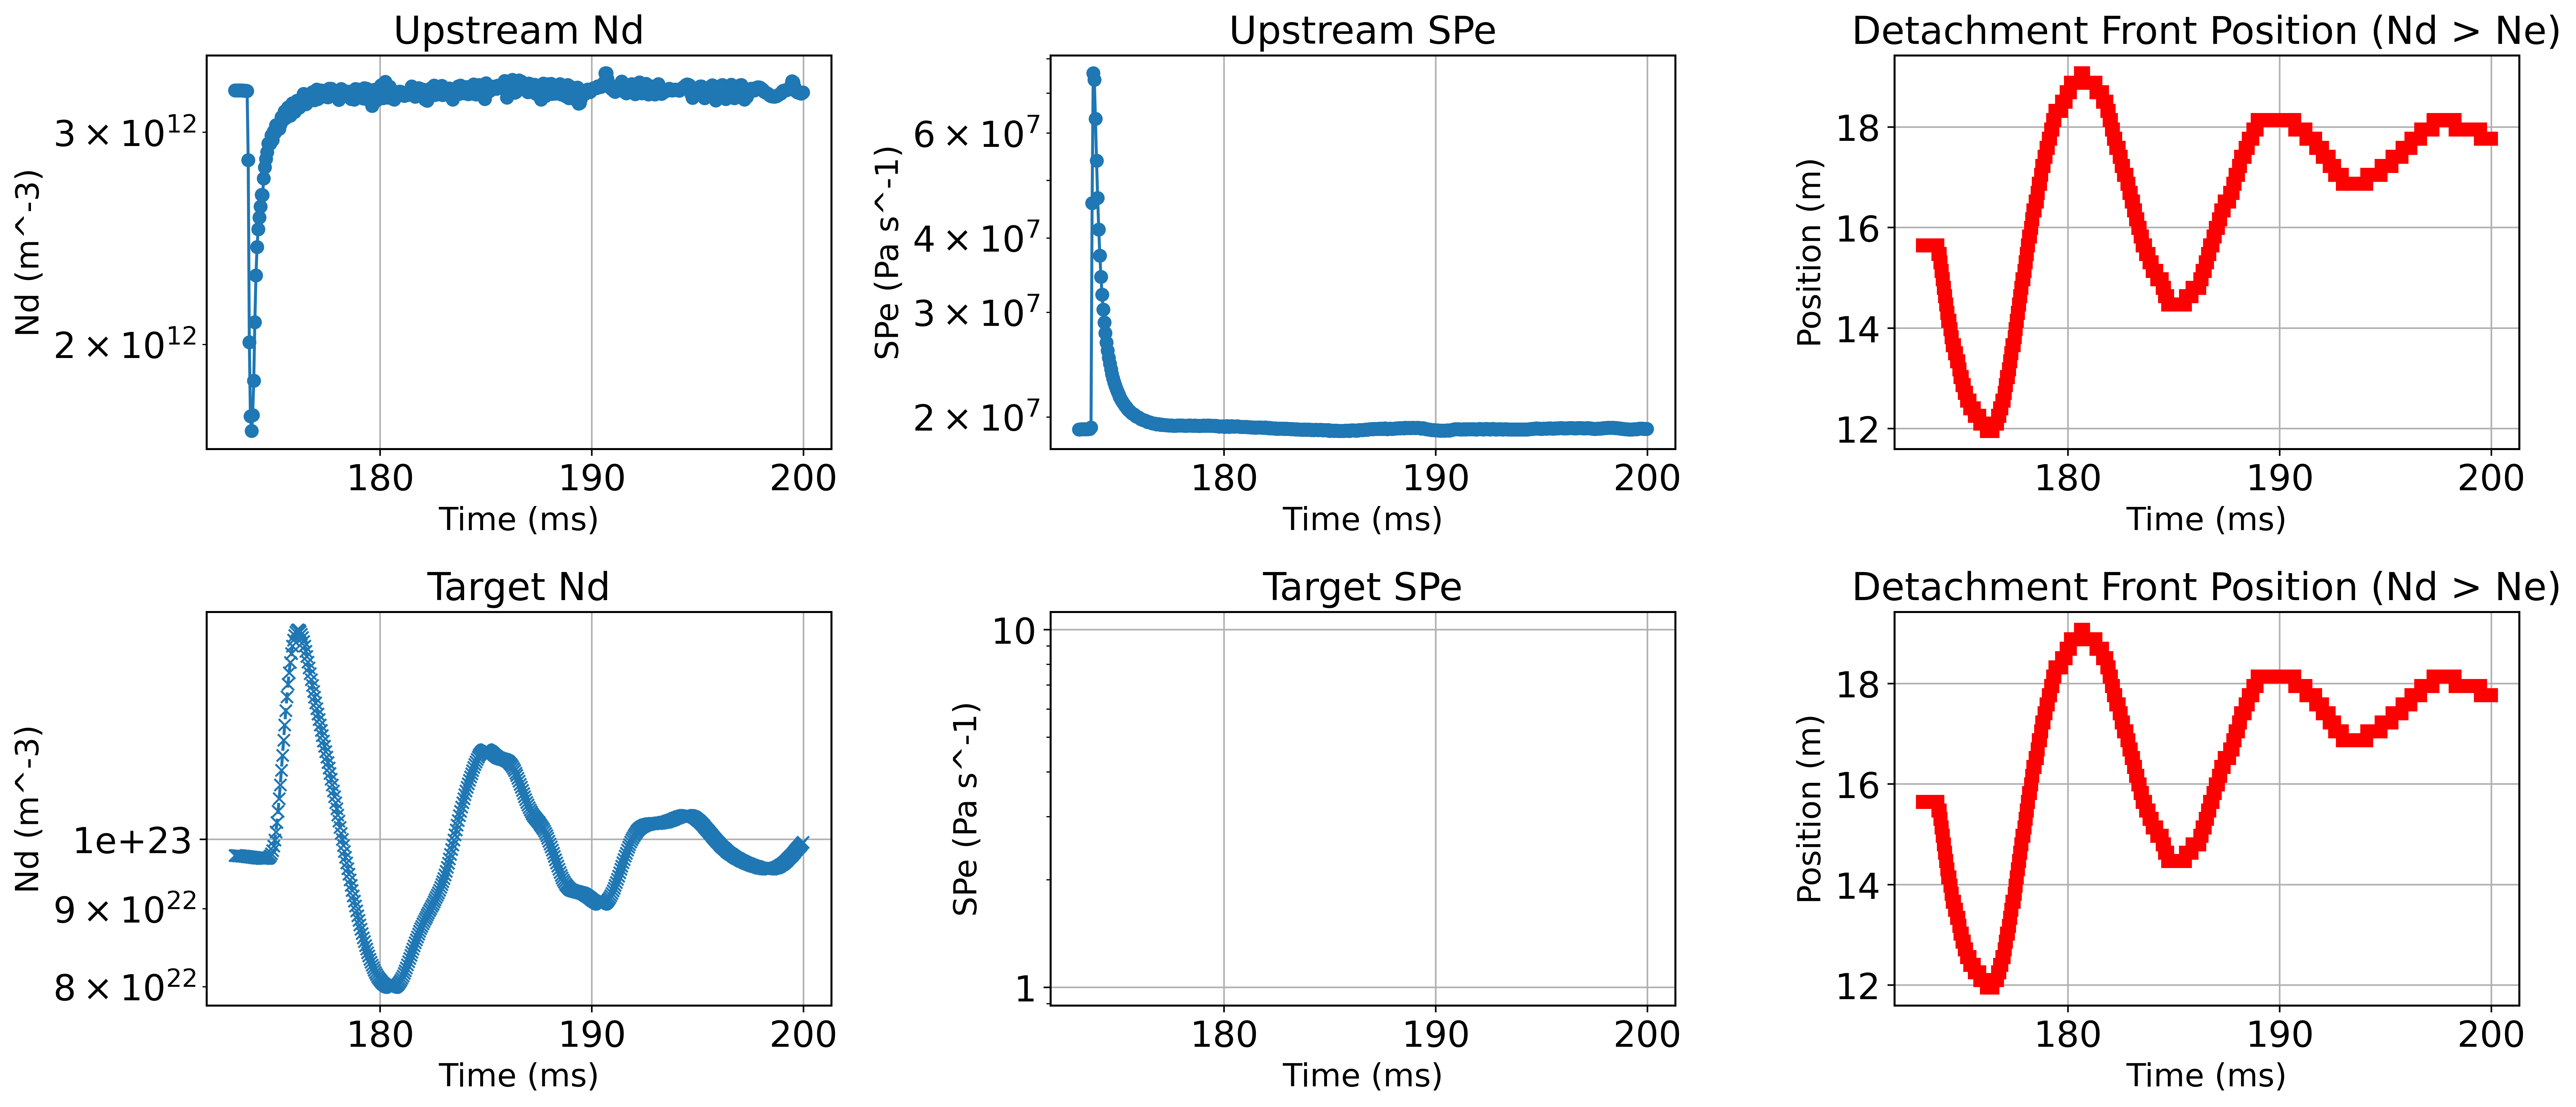

In [36]:
plot_time_history(pulse,variables=['Nd','SPe'], track_detachment_front = True)

In [90]:
plot_profiles_animation(pulse, variables=['Nd'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e30, filename='profiles_animation.gif',
                            time_slices=(-800, None), step=2, detachment_front=True)

convert_gif_to_mp4('profiles_animation.gif', "pulse_only.mp4")

Animation saved as profiles_animation.gif
Moviepy - Building video pulse_only.mp4.
Moviepy - Writing video pulse_only.mp4



Moviepy - Done !
Moviepy - video ready pulse_only.mp4


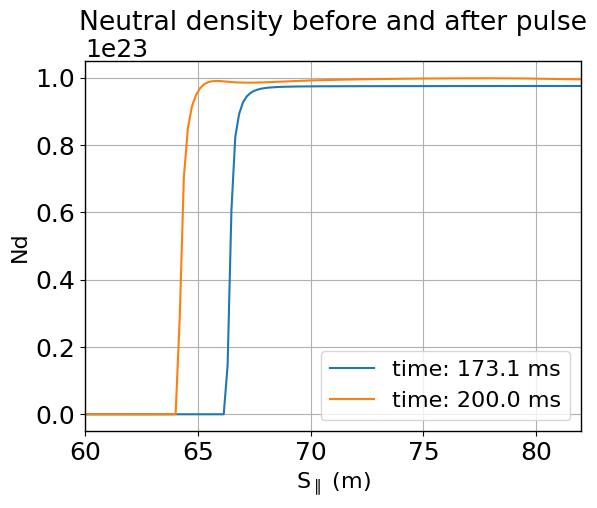

In [72]:
first = pulse.isel(t=0)
last = pulse.isel(t=-1)

y = first['y']
Nd_first = np.ravel(first['Nd'])
Nd_last = np.ravel(last['Nd'])

t_first = first['t'].values
t_conversion = first['t'].attrs.get('conversion', 1.0)
t_first = t_first * t_conversion * 1e3  # Convert to milliseconds

t_last = last['t'].values
t_conversion = last['t'].attrs.get('conversion', 1.0)
t_last = t_last * t_conversion * 1e3  # Convert to milliseconds

plt.plot(y, Nd_first, label=f'time: {t_first:.1f} ms')
plt.plot(y, Nd_last, label=f'time: {t_last:.1f} ms')
plt.xlabel(rf'S$_\parallel$ (m)')
plt.title('Neutral density before and after pulse')
plt.xlim(60, 82)
plt.ylabel('Nd')
plt.legend()

# case /users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/reservior_test/case_02_initial_test_beuler

In [38]:
pulse_pump = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/reservior_test/case_02_initial_test_beuler')

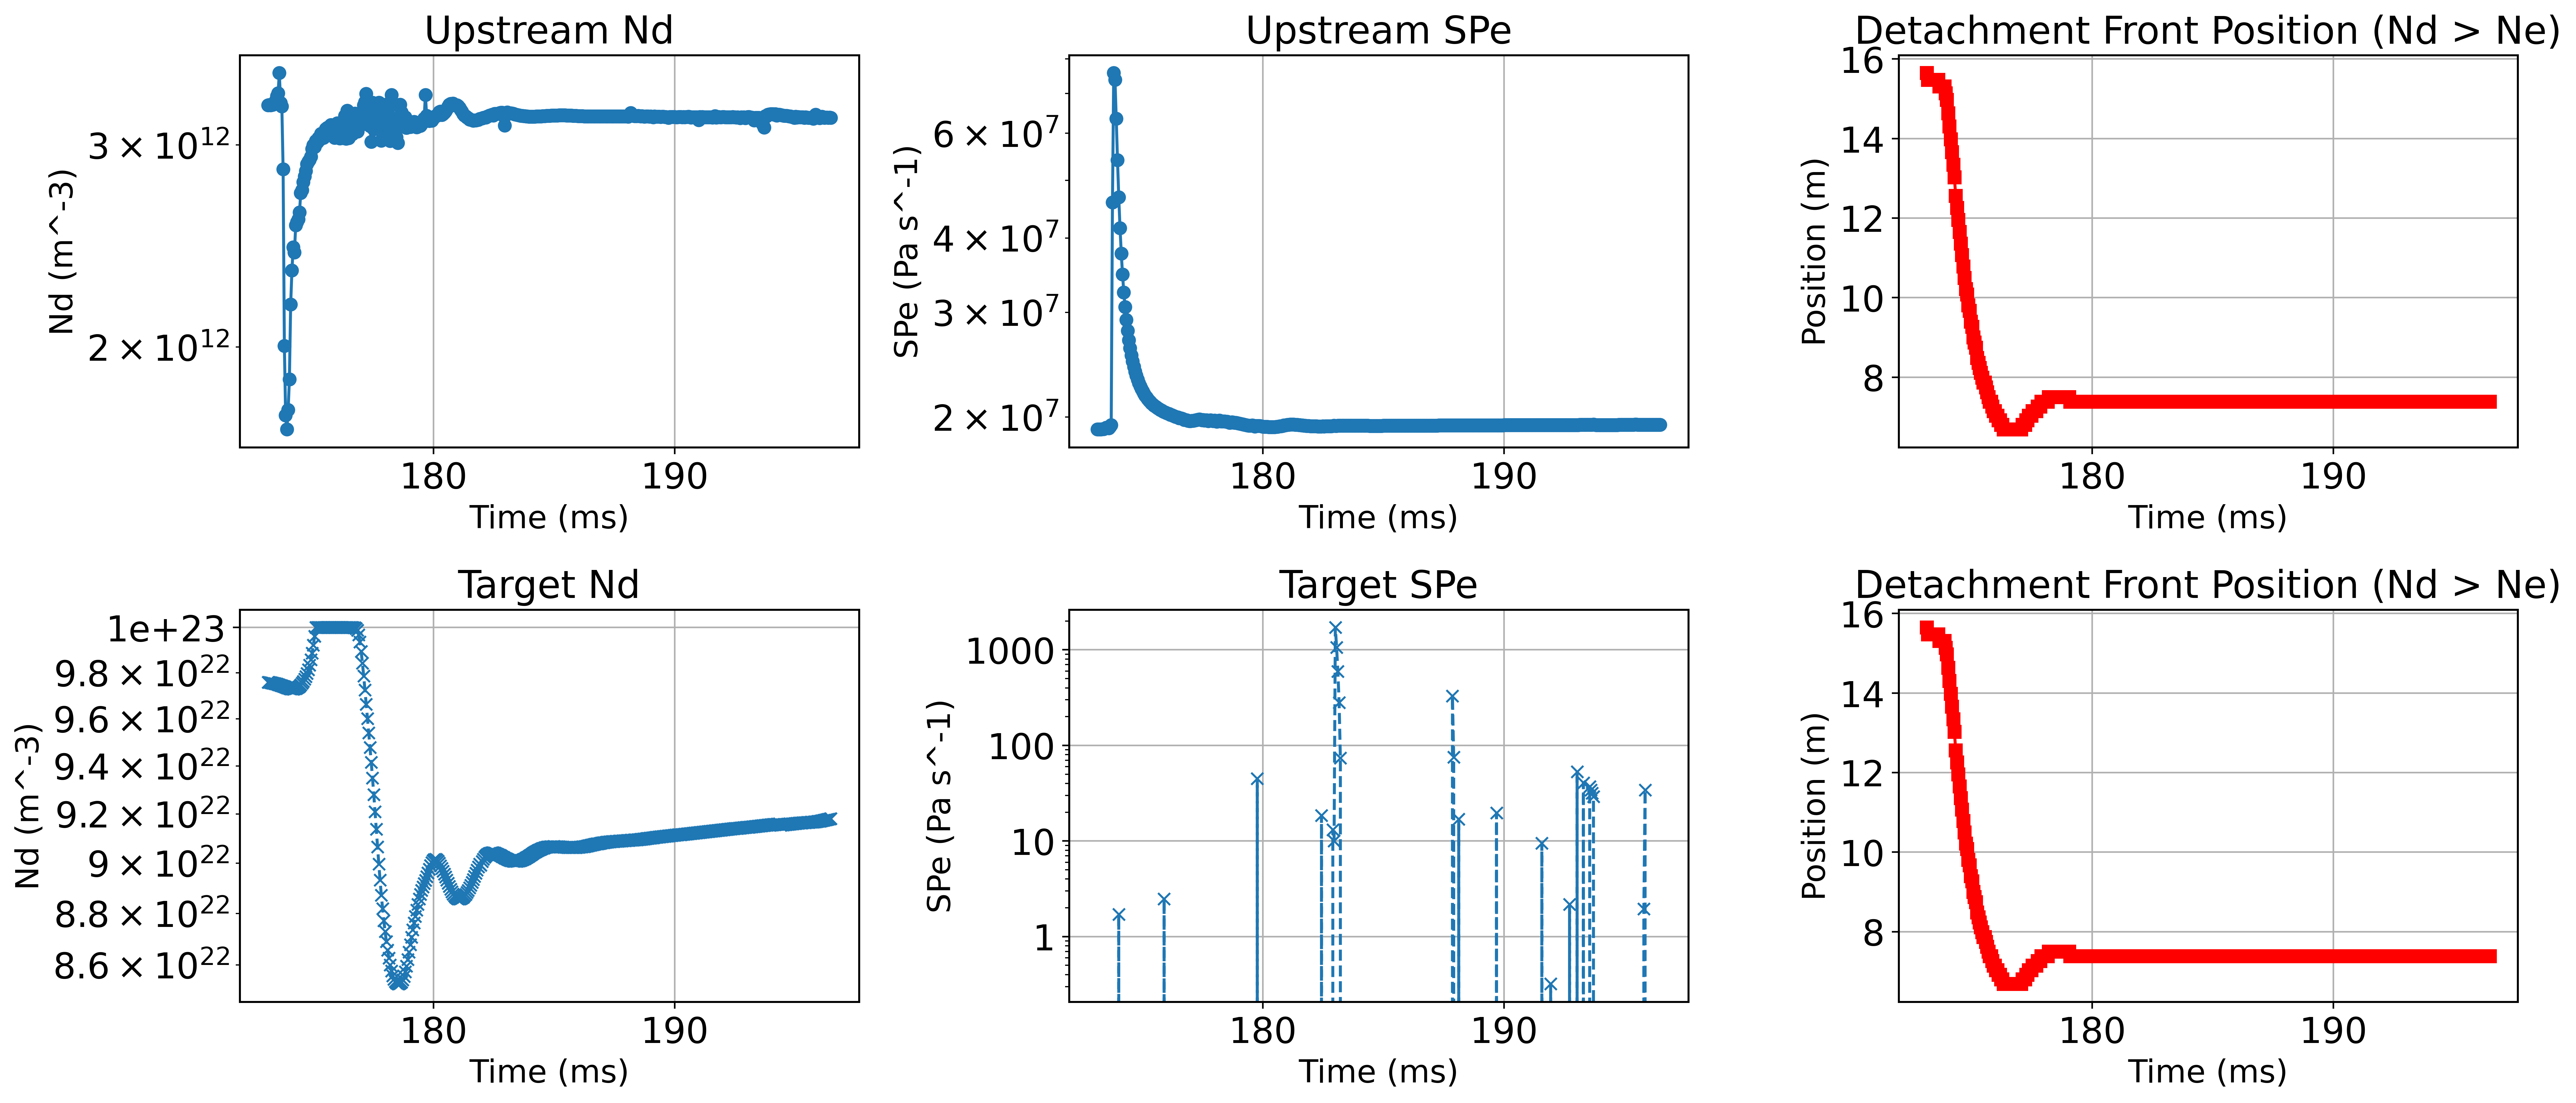

Animation saved as profiles_animation.gif
Moviepy - Building video output_pulse_pump.mp4.
Moviepy - Writing video output_pulse_pump.mp4



Moviepy - Done !
Moviepy - video ready output_pulse_pump.mp4


In [84]:
plot_time_history(pulse_pump,variables=['Nd','SPe'], track_detachment_front = True)



In [98]:
plot_profiles_animation(pulse_pump, variables=['Nd', 'Sd_rsv_div_sol'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e30, filename='profiles_animation.gif',
                            time_slices=(-800, None), step=5, detachment_front=True)

convert_gif_to_mp4('profiles_animation.gif', "output_pulse_pump.mp4")

Animation saved as profiles_animation.gif
Moviepy - Building video output_pulse_pump.mp4.
Moviepy - Writing video output_pulse_pump.mp4



Moviepy - Done !
Moviepy - video ready output_pulse_pump.mp4


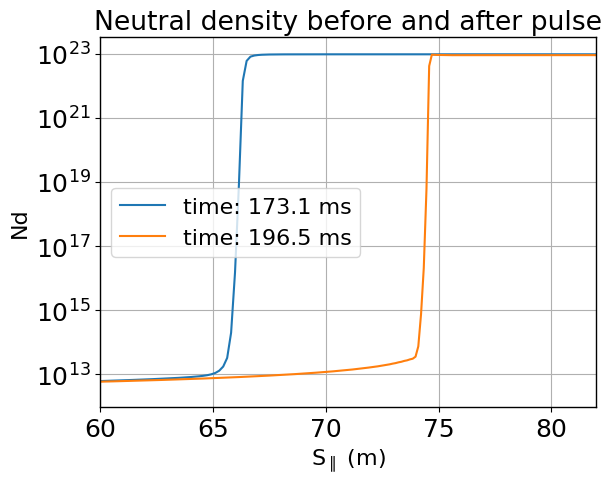

In [60]:
first = pulse_pump.isel(t=0)
last = pulse_pump.isel(t=-1)

y = first['y']
Nd_first = np.ravel(first['Nd'])
Nd_last = np.ravel(last['Nd'])

t_first = first['t'].values
t_conversion = first['t'].attrs.get('conversion', 1.0)
t_first = t_first * t_conversion * 1e3  # Convert to milliseconds

t_last = last['t'].values
t_conversion = last['t'].attrs.get('conversion', 1.0)
t_last = t_last * t_conversion * 1e3  # Convert to milliseconds

plt.plot(y, Nd_first, label=f'time: {t_first:.1f} ms')
plt.plot(y, Nd_last, label=f'time: {t_last:.1f} ms')
plt.xlabel(rf'S$_\parallel$ (m)')
plt.ylabel('Nd')
plt.yscale('log')
plt.title('Neutral density before and after pulse')
plt.xlim(60,82)
plt.legend()

# Steady State pump test

In [62]:
pump_only = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_pump_test/reservior_test/case_08_pump_scan')

In [63]:
source_terms = [
    "Pd+_src", "Pd_src", "Pe_src",
    "SNVd", "SNVd+", "SNd", "SNd+",
    "SPd", "SPd+", "SPe",
    "Sd+_src", "Sd_src", "Sd_target_recycle",
    "density_feedback_src_i_d+", "density_feedback_src_mult_d+",
    "density_feedback_src_p_d+", "density_feedback_src_shape_d+"
]


In [66]:
plot_time_history(pulse_pump,variables=source_terms, track_detachment_front = False)

plot_profiles_animation(pulse_pump, source_terms, data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e30, filename='profiles_animation.gif',
                            time_slices=(-800, None), step=10, detachment_front=True)

convert_gif_to_mp4('profiles_animation.gif', "pump_steady_state.mp4")

ValueError: Dimensions {'y'} do not exist. Expected one or more of ('t',)

ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

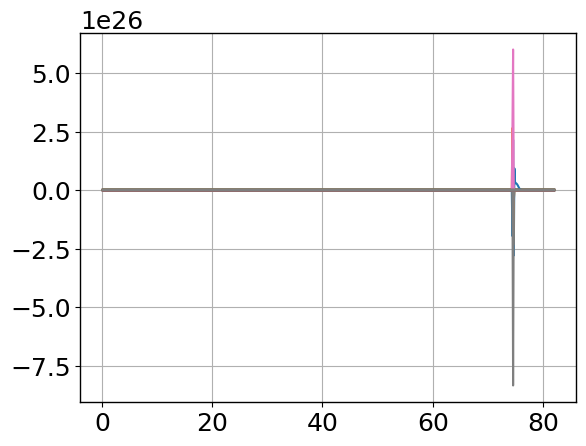

In [76]:
single = pulse_pump.isel(t=-1)
for i in single:
    print(i)
    y = single['y']
    plt.plot(y, np.ravel(single[i]), label=i)
    plt.legend()
    plt.close()


ValueError: ('t', 'y') must be a permuted list of ('t', 'x', 'y', 'z'), unless `...` is included

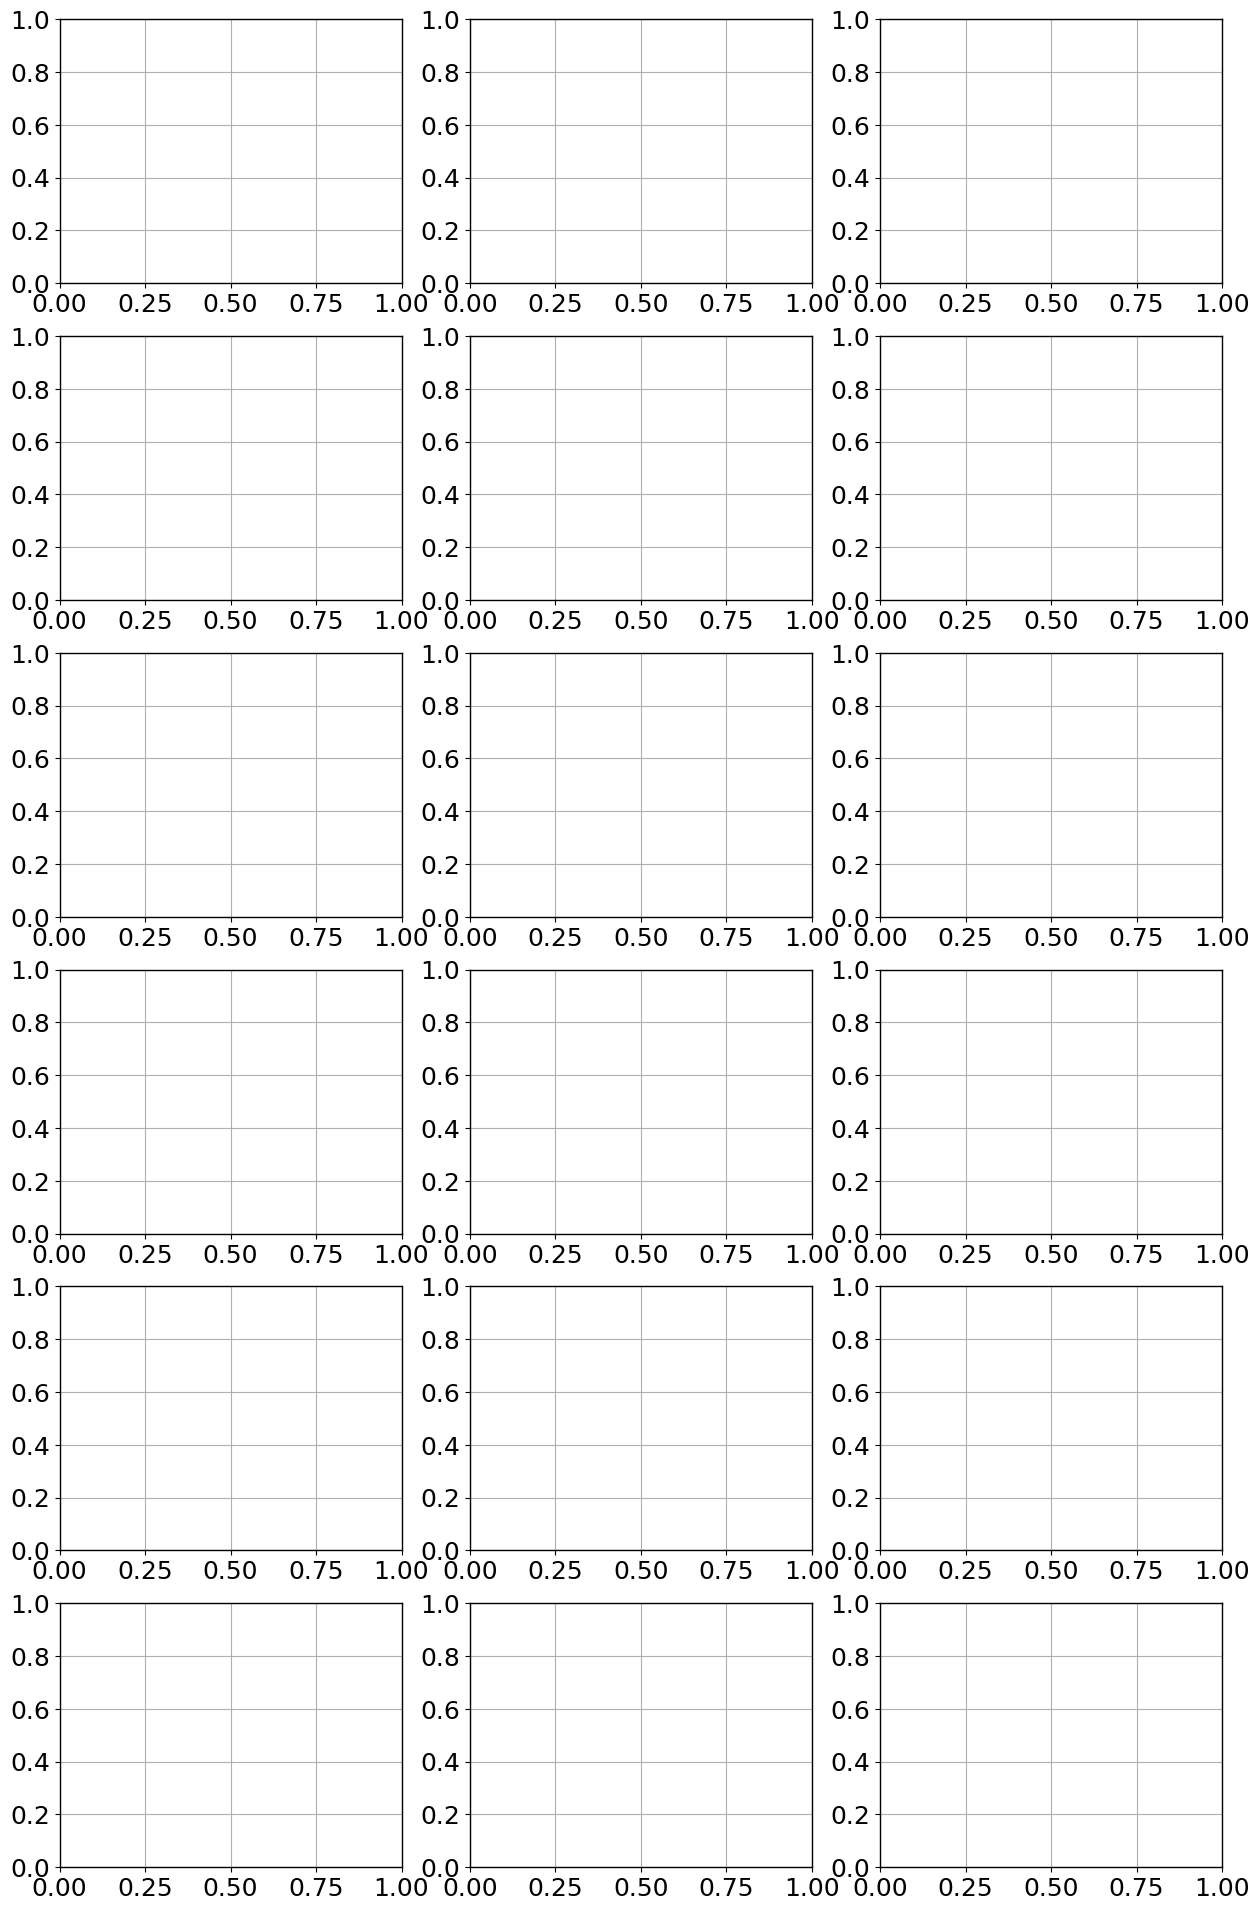

In [74]:
plot_time_history(pump_only, source_terms=source_terms)